In [4]:
import os
import pandas as pd
import numpy as np
import sklearn
from sklearn import neighbors, datasets, preprocessing 

os.chdir('C:\\Users\\shoun\\AIML_Assignment')
os.chdir('C:\\Users\\shoun\\Downloads')
os.getcwd()

'C:\\Users\\shoun\\Downloads'

In [5]:
data = pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,'0'
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,'0'
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,'0'
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,'0'


__Step 2: Check the version of the Library__

In [18]:
pd.__version__

'1.0.1'

In [19]:
np.__version__

'1.18.1'

In [25]:
sklearn.__version__

'0.22.1'

In [6]:
df = data.head(10)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,'0'
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,'0'
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,'0'
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,'0'
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,'0'


__Step 3: Go for different observation like Info, description__

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10 non-null     float64
 1   V1      10 non-null     float64
 2   V2      10 non-null     float64
 3   V3      10 non-null     float64
 4   V4      10 non-null     float64
 5   V5      10 non-null     float64
 6   V6      10 non-null     float64
 7   V7      10 non-null     float64
 8   V8      10 non-null     float64
 9   V9      10 non-null     float64
 10  V10     10 non-null     float64
 11  V11     10 non-null     float64
 12  V12     10 non-null     float64
 13  V13     10 non-null     float64
 14  V14     10 non-null     float64
 15  V15     10 non-null     float64
 16  V16     10 non-null     float64
 17  V17     10 non-null     float64
 18  V18     10 non-null     float64
 19  V19     10 non-null     float64
 20  V20     10 non-null     float64
 21  V21     10 non-null     float64
 22  V22  

In [30]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,34.240000,-0.104733,0.132908,0.894287,0.451404,0.101727,0.348118,0.164510,0.002884,-0.055968,...,-0.045889,-0.011775,-0.027111,0.005042,0.113087,0.130550,-0.050426,0.017248,0.004693,64.765300
std,18.234234,1.315375,1.114637,0.883301,1.281869,1.311950,1.329120,0.815350,0.678882,0.795052,...,0.505568,0.399331,0.510194,0.400188,0.548194,0.407145,0.508273,0.296386,0.252768,184.567145
min,0.000000,-5.401258,-5.450148,-1.192094,-4.515824,-6.631951,-1.763406,-2.705393,-3.807864,-2.094011,...,-2.196848,-0.852309,-1.299920,-1.134769,-1.384620,-1.112725,-1.243924,-1.206921,-1.105751,0.750000
25%,22.000000,-0.859570,-0.079349,0.283232,-0.225658,-0.450083,-0.393016,-0.122310,-0.180018,-0.418537,...,-0.219686,-0.194649,-0.326301,-0.156561,-0.077528,-0.050935,-0.337226,-0.049463,-0.006709,6.440000
50%,35.000000,-0.314901,0.251327,0.876099,0.573206,-0.024977,0.017828,0.180998,0.083157,-0.075668,...,-0.075245,-0.058633,-0.014264,-0.057014,0.109514,0.150302,-0.213096,0.024357,0.021142,19.400000
75%,48.250000,1.110739,0.645313,1.400134,1.253353,0.419191,0.352283,0.560133,0.261569,0.246615,...,0.097444,0.040509,0.235959,0.065273,0.418540,0.395186,0.153526,0.100422,0.085794,42.837500
max,68.000000,1.492936,2.600138,3.402585,3.710061,3.281972,5.122103,4.371691,1.530817,4.009259,...,2.456724,1.943465,1.353650,2.458589,1.112970,0.883548,3.065576,0.857373,0.949594,1402.950000


In [33]:
for col in df.columns:
    print(col)

Time
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
Amount
Class


In [47]:
df.agg('Time')

0    0.0
1    0.0
2    1.0
3    1.0
4    2.0
5    2.0
6    4.0
7    7.0
8    7.0
9    9.0
Name: Time, dtype: float64

In [43]:
df.cumsum(axis=0)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,-0.167950,0.193370,2.702827,1.826309,-0.278303,0.380027,0.160796,0.183800,0.108362,...,-0.244082,-0.360834,-0.009186,-0.272918,0.295710,-0.063220,0.124575,-0.006329,152.31,'0''0'
2,1.0,-1.526304,-1.146794,4.476036,2.206089,-0.781501,2.180526,0.952257,0.431475,-1.406292,...,0.003916,0.410845,0.900226,-0.962199,-0.031932,-0.202317,0.069222,-0.066081,530.97,'0''0''0'
3,2.0,-2.492576,-1.332020,6.269030,1.342798,-0.791810,3.427730,1.189865,0.808911,-2.793317,...,-0.104384,0.416119,0.709906,-2.137775,0.615444,-0.424246,0.131945,-0.004623,654.47,'0''0''0''0'
4,4.0,-3.650809,-0.454283,7.817747,1.745832,-1.199004,3.523651,1.782806,0.538379,-1.975577,...,-0.113815,1.214397,0.572448,-1.996508,0.409434,0.078046,0.351368,0.210530,724.46,'0''0''0''0''0'
5,6.0,-4.076775,0.506240,8.958857,1.577579,-0.778017,3.493923,2.259007,0.798693,-2.544249,...,-0.322069,0.654572,0.546050,-2.367934,0.176641,0.183961,0.605212,0.291610,728.13,'0''0''0''0''0''0'
6,10.0,-2.847117,0.647244,9.004227,2.780192,-0.586136,3.766632,2.253848,0.879906,-2.079289,...,-0.489785,0.383863,0.391946,-3.147990,0.926777,-0.073276,0.639719,0.296778,733.12,'0''0''0''0''0''0''0'
7,17.0,-3.491387,2.065207,10.078608,2.287993,0.362798,4.194750,3.374480,-2.927958,-1.463914,...,1.453681,-0.631592,0.449450,-3.797699,0.511511,-0.124910,-0.567202,-0.788561,773.92,'0''0''0''0''0''0''0''0'
8,24.0,-4.385673,2.351365,9.965416,2.016467,3.032397,7.916568,3.744625,-2.076874,-1.855961,...,1.380255,-0.899684,0.245217,-2.786107,0.884716,-0.509067,-0.555455,-0.646157,867.12,'0''0''0''0''0''0''0''0''0'
9,33.0,-4.723934,3.470958,11.009782,1.794280,3.531758,7.669807,4.396208,-2.007335,-2.592689,...,1.133342,-1.533436,0.124423,-3.171157,0.814983,-0.414868,-0.309235,-0.563081,870.80,'0''0''0''0''0''0''0''0''0''0'


__Step 4: Check null Values__

In [48]:
df.isna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


__Step 5: Check duplicate values__

In [50]:
df.duplicated('V4')

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [55]:
df['Class'] = df['Class'].astype(str)
print(df.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class      object
dtype: object


C:\Users\shoun\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


__Step 6: Filter for different condition - come up with insights from the dataset, basic plot, distribution plots__

In [8]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,'0'
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,'0'
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,'0'
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,'0'


In [13]:
print('Filter by Time where time = 1')
flt = data[data['Time']==1]
flt

Filter by Time where time = 1


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'


In [20]:
flt.shape

(2, 31)

In [14]:
print('Filter by Amount of even values')
flt2 = data[data['Amount']%2==0]
flt2

Filter by Amount of even values


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
27,23.0,1.322707,-0.174041,0.434555,0.576038,-0.836758,-0.831083,-0.264905,-0.220982,-1.071425,...,-0.284376,-0.323357,-0.037710,0.347151,0.559639,-0.280158,0.042335,0.028822,16.0,'0'
117,76.0,-1.024576,0.522289,1.787699,0.202672,-1.140803,-0.137831,-0.336555,0.670704,0.071670,...,0.315868,0.847565,0.148877,0.549791,-0.585131,0.325841,-0.068871,0.059713,50.0,'0'
126,79.0,-2.374380,0.597145,0.036656,-1.406989,0.299692,-0.341103,0.624572,0.369832,0.344458,...,-0.423323,-0.527400,0.162980,-0.894113,-0.087018,0.718174,-0.011363,-0.431914,80.0,'0'
183,118.0,1.431053,-0.648101,-0.331664,-1.207383,-0.012786,0.704440,-0.732126,0.183139,-0.878334,...,0.112749,0.222296,-0.244591,-1.688158,0.609778,-0.088366,0.010438,-0.014499,20.0,'0'
185,123.0,-0.505728,0.666300,1.080993,-0.447630,1.039490,0.184017,0.882797,-0.142340,-0.608661,...,-0.058792,0.022073,-0.226241,-0.986435,-0.065937,0.259685,0.150573,-0.042581,40.0,'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284778,172764.0,-0.764523,0.588379,-0.907599,-0.418847,0.901528,-0.760802,0.758545,0.414698,-0.730854,...,0.003530,-0.431876,0.141759,0.587119,-0.200998,0.267337,-0.152951,-0.065285,80.0,'0'
284780,172766.0,-1.727503,1.108356,2.219561,1.148583,-0.884199,0.793083,-0.527298,0.866429,0.853819,...,-0.094708,0.236818,-0.204280,1.158185,0.627801,-0.399981,0.510818,0.233265,30.0,'0'
284784,172768.0,-0.669662,0.923769,-1.543167,-1.560729,2.833960,3.240843,0.181576,1.282746,-0.893890,...,0.183856,0.202670,-0.373023,0.651122,1.073823,0.844590,-0.286676,-0.187719,40.0,'0'
284796,172780.0,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,60.0,'0'


In [16]:
print('Filter by V8 only positive values')
flt3 = data[data['V8']>=0]
flt3

Filter by V8 only positive values


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,'0'
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,'0'
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,'0'
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,'0'


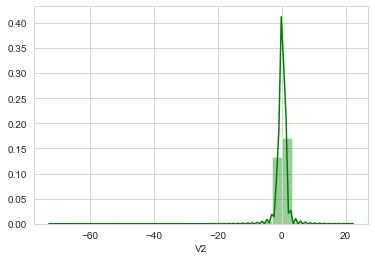

In [41]:
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set_style('whitegrid') 
sns.distplot(data['V2'], kde = True, color ='green', bins = 30) 

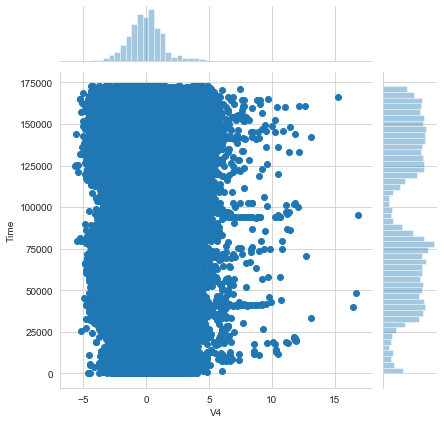

In [29]:
sns.jointplot(x ='V4', y ='Time', data = data)

__Step 7: Use a histogram to plot different columns__

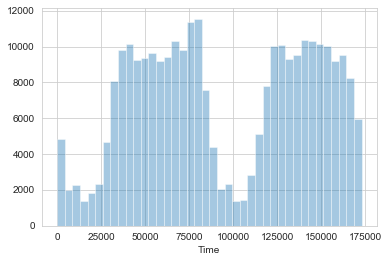

In [40]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

sb.distplot(data['Time'],kde = False, bins = 40)
plt.show()